In [3]:
!pip3 install pandas seaborn

  Using cached pandas-1.3.1-cp39-cp39-win_amd64.whl (10.4 MB)
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached matplotlib-3.4.2-cp39-cp39-win_amd64.whl (7.1 MB)
  Using cached scipy-1.7.1-cp39-cp39-win_amd64.whl (33.8 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp39-cp39-win_amd64.whl (51 kB)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
match=pd.read_csv('D:\Data Science\IPL\Dataset\matches.csv')

In [3]:
match.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
delivery=pd.read_csv('D:\Data Science\IPL\Dataset\deliveries.csv')

In [5]:
delivery.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [16]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [17]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [9]:
#List of all the participating teams
all_teams = match['team1'].tolist() + match['team2'].tolist()
all_teams = list(set(all_teams))
all_teams

['Royal Challengers Bangalore',
 'Rajasthan Royals',
 'Gujarat Lions',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Delhi Daredevils',
 'Sunrisers Hyderabad',
 'Rising Pune Supergiant',
 'Deccan Chargers',
 'Kings XI Punjab',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Rising Pune Supergiants']

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='eliminator', ylabel='count'>

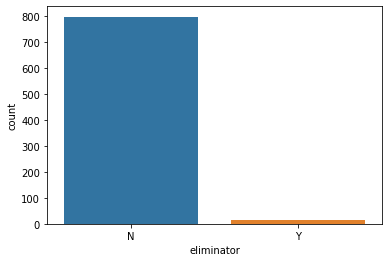

In [27]:
#Eliminator
match['eliminator'].value_counts()

#graphical view
sns.countplot('eliminator', data=match)

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'M Chinnaswamy Stadium'),
  Text(1, 0, 'Punjab Cricket Association Stadium, Mohali'),
  Text(2, 0, 'Feroz Shah Kotla'),
  Text(3, 0, 'Wankhede Stadium'),
  Text(4, 0, 'Eden Gardens'),
  Text(5, 0, 'Sawai Mansingh Stadium'),
  Text(6, 0, 'Rajiv Gandhi International Stadium, Uppal'),
  Text(7, 0, 'MA Chidambaram Stadium, Chepauk'),
  Text(8, 0, 'Dr DY Patil Sports Academy'),
  Text(9, 0, 'Newlands'),
  Text(10, 0, "St George's Park"),
  Text(11, 0, 'Kingsmead'),
  Text(12, 0, 'SuperSport Park'),
  Text(13, 0, 'Buffalo Park'),
  Text(14, 0, 'New Wanderers Stadium'),
  Text(15, 0, 'De Beers Diamond Oval'),
  Text(16, 0, 'OUTsurance Oval'),
  Text(17, 0, 'Brabourne Stadium'),
  Text(18, 0, 'Sardar Patel Stadium, Motera'),
  Text(19, 0, 'Barabati Stadium'),
  Text(20, 0, 'Vidarbha Cricket Association Stadium, Ja

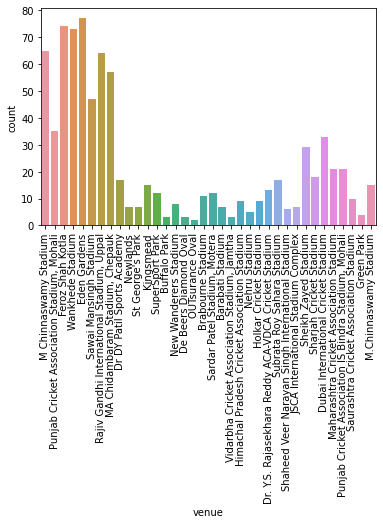

In [12]:
#Number of matches per venue
sns.countplot('venue', data=match)
plt.xticks(rotation='vertical')

<AxesSubplot:>

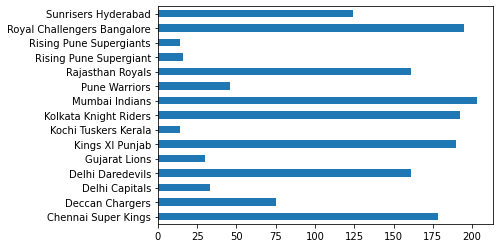

In [13]:
#Matches per team
x = match['team1'].value_counts()
y = match['team2'].value_counts()
(x+y).plot(kind='barh')

In [22]:
#Match won by each team
x=pd.DataFrame({"Winner":match['winner']}).value_counts()
print(x)

Winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Kolkata Knight Riders'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Daredevils'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Rajasthan Royals'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Deccan Chargers'),
  Text(7, 0, 'Mumbai Indians'),
  Text(8, 0, 'Pune Warriors'),
  Text(9, 0, 'Kochi Tuskers Kerala'),
  Text(10, 0, 'Sunrisers Hyderabad'),
  Text(11, 0, 'Rising Pune Supergiants'),
  Text(12, 0, 'Gujarat Lions'),
  Text(13, 0, 'Rising Pune Supergiant'),
  Text(14, 0, 'Delhi Capitals')])

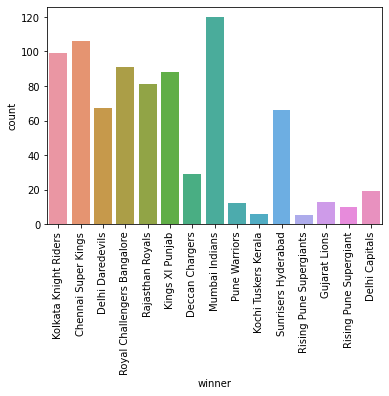

In [23]:
sns.countplot('winner', data=match)
plt.xticks(rotation='vertical')

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


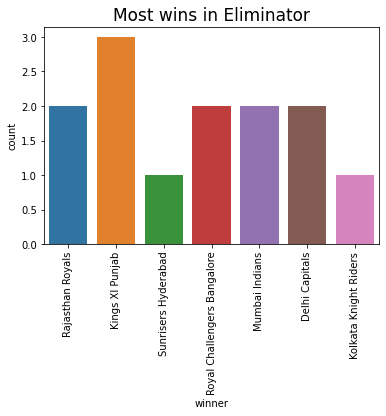

In [26]:
#Most win in eliminator
sns.countplot(match['winner'][match['eliminator']=='Y'],data=match)
plt.title("Most wins in Eliminator",fontsize=17)
plt.xticks(rotation=90)
plt.show()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64


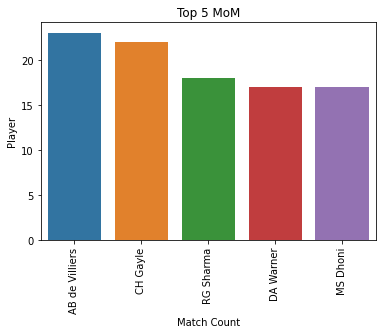

In [29]:
temp_data=match['player_of_match'].value_counts().head()
print(temp_data)
#sns.barplot(x=data['player_of_match'].value_counts().head().index,y=data['player_of_match'].value_counts().head().values,data=data)
sns.barplot(x=temp_data.index,y=temp_data.values,data=match)

plt.title("Top 5 MoM")
plt.xticks(rotation=90)
plt.xlabel("Match Count")
plt.ylabel("Player")
plt.show()

In [30]:
#About delivery
delivery.shape

(193468, 18)

In [31]:
top_batsman=delivery.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values('batsman_runs', ascending=False).head(10)

<AxesSubplot:xlabel='batsman'>

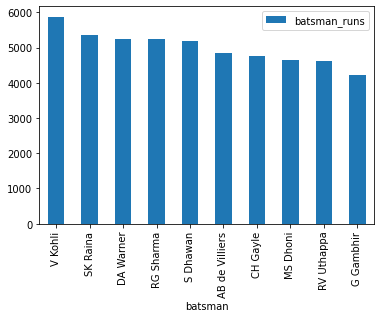

In [32]:
top_batsman.set_index('batsman', inplace=True)
top_batsman.plot(kind='bar')

In [35]:
delivery.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values('total_runs', ascending=False).head(10)

,bowler,total_runs
276,PP Chawla,4330
133,Harbhajan Singh,4038
6,A Mishra,3913
99,DJ Bravo,3869
281,R Ashwin,3756
396,UT Yadav,3672
293,RA Jadeja,3515
350,SL Malinga,3486
264,P Kumar,3342
57,B Kumar,3333


<AxesSubplot:xlabel='batting_team'>

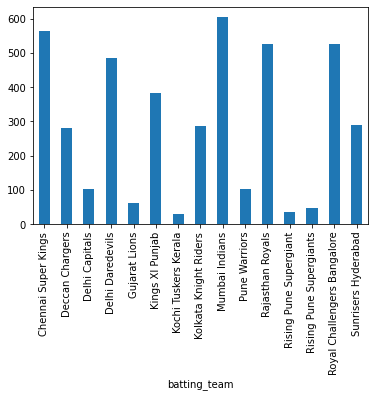

In [36]:
mask=delivery['bowler']=='PP Chawla'
delivery[mask].groupby('batting_team')['total_runs'].agg('sum').plot(kind='bar')

In [37]:
delivery6=delivery[mask]
delivery6=delivery6[['batting_team','over','batsman_runs']]

In [38]:
x=delivery6.pivot_table(values='batsman_runs', index='batting_team', columns='over', aggfunc='count')

<AxesSubplot:xlabel='over', ylabel='batting_team'>

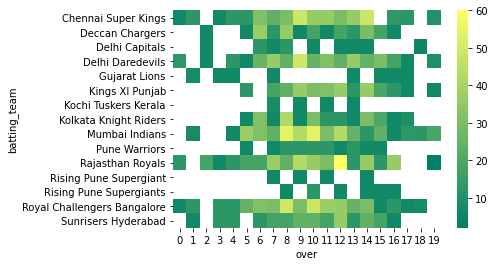

In [39]:
sns.heatmap(x, cmap='summer')

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'run out'),
  Text(2, 0, 'bowled'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'retired hurt'),
  Text(5, 0, 'stumped'),
  Text(6, 0, 'caught and bowled'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

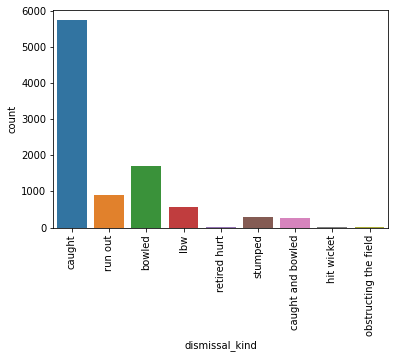

In [40]:
sns.countplot('dismissal_kind', data=delivery)
plt.xticks(rotation='vertical')

In [41]:
mask1=delivery['dismissal_kind']=='caught'
mask2=delivery['dismissal_kind']=='bowled'
mask3=delivery['dismissal_kind']=='lbw'
mask4=delivery['dismissal_kind']=='caught and bowled'
mask5=delivery['dismissal_kind']=='stumped'

new_del=delivery[mask1 | mask2 | mask3 | mask4 | mask5]

<AxesSubplot:xlabel='bowler'>

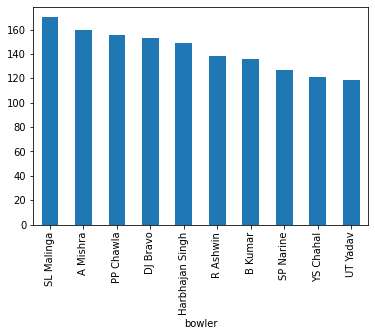

In [42]:
new_del.groupby('bowler')['player_dismissed'].agg('count').sort_values(ascending=False).head(10).plot(kind='bar')

In [43]:
mask=delivery['bowler']=='JJ Bumrah'
mask2=delivery['batsman']=='V Kohli'
delivery[mask].groupby('batsman')['batsman_runs'].agg('count').sort_values(ascending=False)['V Kohli']

79

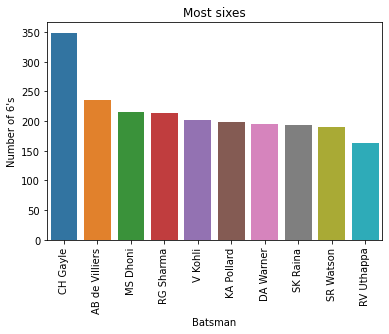

In [44]:
temp_df = delivery.groupby('batsman')['batsman_runs'].agg(lambda x:(x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).head(10).reset_index(drop=True)
temp_df
sns.barplot(x=temp_df['batsman'],y=temp_df['batsman_runs'],data=temp_df)

plt.title("Most sixes")
plt.xticks(rotation=90)
plt.xlabel("Batsman")
plt.ylabel("Number of 6's")
plt.show()

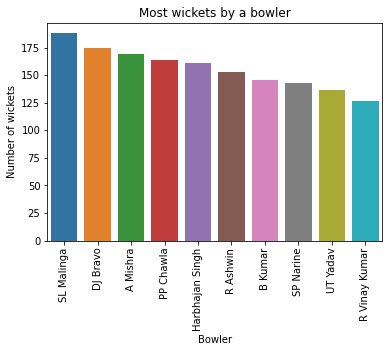

In [45]:
temp_df = delivery.groupby('bowler')['is_wicket'].agg('sum').reset_index().sort_values(by='is_wicket', ascending=False).reset_index(drop=True).head(10)
sns.barplot(x=temp_df['bowler'],y=temp_df['is_wicket'],data=temp_df)

plt.title("Most wickets by a bowler")
plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Number of wickets")
plt.show()